In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [2]:
import pandas as pd
sample_submission = pd.read_csv("./nlp-getting-started/sample_submission.csv")
test = pd.read_csv("./nlp-getting-started/test.csv")
train = pd.read_csv("./nlp-getting-started/train.csv")

In [3]:
train.shape

(7613, 5)

In [4]:
test.shape

(3263, 4)

In [5]:
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [7]:
train.keyword.unique().size

222

In [8]:
train.keyword.isnull().sum()

61

In [9]:
train.location.isnull().sum()

2533

In [10]:
train.text.isnull().sum()

0

In [12]:
for i in range(0,5):
    print(i,train.text[i])

0 Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1 Forest fire near La Ronge Sask. Canada
2 All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3 13,000 people receive #wildfires evacuation orders in California 
4 Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 


# Remove unwanted char

In [14]:
import re

In [23]:
def textCleaning(text):
#     text = re.sub("http(s)?://\w+\.\w+/\w+","",text)
    text = re.sub("http(s)?(://\w+)?(\.)?(\w+)?(/)?(\w+)?","",text) # To remove links first
    text = re.sub("[^\w\s]+","",text) # To remove other than word chars and white space
    text = re.sub("[\d]+","",text) # To remove only digits
    text = re.sub("\s+"," ",text) # To make multiple spaces to one space
    text = re.sub("^\s","",text) # To replace starting space
    text = re.sub("\s$","",text) # To replace end space
    text = re.sub("[_]+"," ",text) # To replace anything other than alphabets
    text = re.sub("[^aA-zZ]+"," ",text) # To replace anything other than alphabets
    #print(text)
    return(text)
print(train.text[1790])
textCleaning(train.text[1790])
# textCleaning("Aftershock: Protect Yourself and Profit in the Next Global Financial Meltdown by David Wiedemer http http://t.co/WZTz4hgMVq")

am boy Crash 


'am boy Crash'

In [29]:
train.text = train.text.apply(textCleaning)
test.text = test.text.apply(textCleaning)

In [25]:
train.text[353]

'Build your own kingdom and lead your army to victory Start g this friend code LZKTJNOX'

In [26]:
train.text.str.contains("http").sum()

0

In [27]:
for i in range(0,50):
    print(i,train.text[i])

0 Our Deeds are the Reason of this earthquake May ALLAH Forgive us all
1 Forest fire near La Ronge Sask Canada
2 All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected
3 people receive wildfires evacuation orders in California
4 Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school
5 RockyFire Update California Hwy closed in both directions due to Lake County fire CAfire wildfires
6 flood disaster Heavy rain causes flash flooding of streets in Manitou Colorado Springs areas
7 Im on top of the hill and I can see a fire in the woods
8 Theres an emergency evacuation happening now in the building across the street
9 Im afraid that the tornado is coming to our area
10 Three people died from the heat wave so far
11 Haha South Tampa is getting flooded hah WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK flooding
12 raining flooding Florida TampaBay Tampa or

In [28]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in ...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1


In [31]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,Heard about earthquake is different cities sta...
2,3,NaN,NaN,there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,Apocalypse lighting Spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills in China and Taiwan


In [83]:
cv = CountVectorizer()

In [36]:
# a = [0,1,2,3,4,5,6,7,8,9]
# a[:8]

[0, 1, 2, 3, 4, 5, 6, 7]

In [38]:
# a[8:]

In [84]:
train_dtm = cv.fit_transform(train.text)
test_dtm = cv.fit_transform(test.text)

In [93]:
train_dtm

<7613x16844 sparse matrix of type '<class 'numpy.int64'>'
	with 96241 stored elements in Compressed Sparse Row format>

In [94]:
test_dtm

<3263x10083 sparse matrix of type '<class 'numpy.int64'>'
	with 41468 stored elements in Compressed Sparse Row format>

In [85]:
X_train,X_test,y_train,y_test = train_test_split(train_dtm,train.target,test_size=.2,random_state=3)

In [86]:
X_train.shape

(6090, 16844)

In [87]:
X_test.shape

(1523, 16844)

In [95]:
y_train.shape

(6090,)

In [96]:
y_test.shape

(1523,)

In [97]:
mnb = MultinomialNB()
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [102]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [103]:
y_pred = mnb.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [105]:
accuracy_score(y_test,y_pred)*100

79.44845699277742

In [105]:
accuracy_score(y_test,y_pred)*100

79.44845699277742

In [107]:
f1_score(y_test,y_pred)*100

75.67987567987569

In [109]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[723, 118],
       [195, 487]])

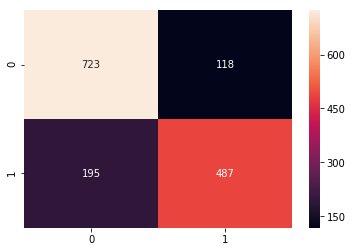

In [112]:
sns.heatmap(cm,annot=True,fmt="d")

# Lets imporove the model by tuning some parameter

In [132]:
cv = CountVectorizer(stop_words="english",ngram_range=(1,4),max_features=5000)

In [133]:
train_dtm = cv.fit_transform(train.text)
test_dtm = cv.fit_transform(test.text)

In [134]:
train_dtm

<7613x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 64860 stored elements in Compressed Sparse Row format>

In [135]:
test_dtm

<3263x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 29179 stored elements in Compressed Sparse Row format>

In [136]:
X_train,X_test,y_train,y_test = train_test_split(train_dtm,train.target,test_size=.2,random_state=3)

In [137]:
X_train.shape

(6090, 5000)

In [138]:
X_test.shape

(1523, 5000)

In [139]:
y_train.shape

(6090,)

In [140]:
y_test.shape

(1523,)

In [141]:
mnb = MultinomialNB()
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [142]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [143]:
y_pred = mnb.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [144]:
accuracy_score(y_test,y_pred)*100

79.31713722915299

In [145]:
accuracy_score(y_test,y_pred)*100

79.31713722915299

In [146]:
f1_score(y_test,y_pred)*100

73.41772151898735

In [147]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[773,  68],
       [247, 435]])

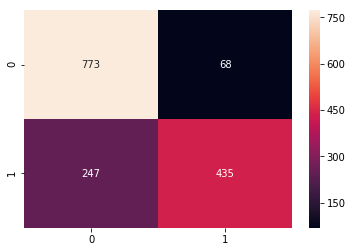

In [148]:
sns.heatmap(cm,annot=True,fmt="d")

# Using Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
lr = LogisticRegression()

In [151]:
lr.fit(X_train,y_train)

/Users/vigneshkarthick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [152]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [153]:
accuracy_score(y_test,y_pred)*100

80.03939592908733

In [154]:
accuracy_score(y_test,y_pred)*100

80.03939592908733

In [155]:
f1_score(y_test,y_pred)*100

75.75757575757575

In [156]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[744,  97],
       [207, 475]])

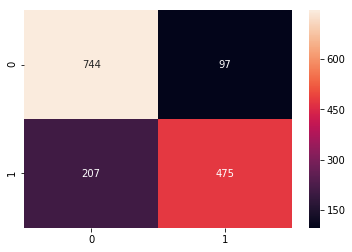

In [157]:
sns.heatmap(cm,annot=True,fmt="d")

# submitting data on Kaggle

In [159]:
test_dtm

<3263x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 29179 stored elements in Compressed Sparse Row format>

In [160]:
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [161]:
sample_submission.target = lr.predict(test_dtm)

In [163]:
sample_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1


In [166]:
sample_submission.to_csv("sample_submission1.csv",index=False)

In [167]:
sample_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
